# Travail 1

## Base de données "cars"

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from eval_method import eval_method


from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

from sklearn import preprocessing

In [202]:
file = "datasets/cars.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,Pachat,Pmaint,Nportes,Npers,Tcoffre,Surete,Verdict
0,thaut,thaut,2.0,2.0,petit,bas,nacc
1,thaut,thaut,2.0,2.0,petit,moyen,nacc
2,thaut,thaut,2.0,2.0,petit,haut,nacc
3,thaut,thaut,2.0,2.0,moyen,bas,nacc
4,thaut,thaut,2.0,2.0,moyen,moyen,nacc
...,...,...,...,...,...,...,...
1723,bas,bas,5plus,plus,moyen,moyen,bon
1724,bas,bas,5plus,plus,moyen,haut,tbon
1725,bas,bas,5plus,plus,grand,bas,nacc
1726,bas,bas,5plus,plus,grand,moyen,bon


In [203]:
class_names = data['Verdict'].unique()
feature_cols = feature_cols = data.columns[:-1]
feature_cols, class_names

(Index(['Pachat', 'Pmaint', 'Nportes', 'Npers', 'Tcoffre', 'Surete'], dtype='object'),
 array(['nacc', 'acc', 'tbon', 'bon'], dtype=object))

In [204]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data

,Pachat,Pmaint,Nportes,Npers,Tcoffre,Surete,Verdict
0,3,3,0,0,2,0,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,1,2
3,3,3,0,0,1,0,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,2,1
1724,0,0,3,2,1,1,3
1725,0,0,3,2,0,0,2
1726,0,0,3,2,0,2,1


In [205]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,Pachat,Pmaint,Nportes,Npers,Tcoffre,Surete
599,1,1,2,0,1,1
1201,2,0,0,1,1,2
628,1,1,3,0,0,2
1498,0,1,3,1,1,2
1263,2,0,2,2,1,0


In [206]:
feature_cols = data.columns[:-1]
feature_cols

Index(['Pachat', 'Pmaint', 'Nportes', 'Npers', 'Tcoffre', 'Surete'], dtype='object')

In [207]:
clf_gini = DecisionTreeClassifier(ccp_alpha=0.01)  # (indice GINI), Example d'élagage en utilisant ccp_alpha
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [208]:
y_pred_gini = clf_gini.predict(X_test)
"les prédiction de l'ensemble de test", y_pred_gini

("les prédiction de l'ensemble de test",
 array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
        0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
        2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
        0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2,
        2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0,
        2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
        0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 

In [209]:
eval_method(y_test, y_pred_gini);

Accuracy :  0.8265895953757225
ROC AUC Score :  0.66708775950888
Kappa :  0.6094073377234243
Confusion Matrix :
 [[ 60   0  23   0]
 [ 11   0   0   0]
 [  9   0 226   0]
 [ 17   0   0   0]]


In [210]:
le.classes_

array(['acc', 'bon', 'nacc', 'tbon'], dtype=object)

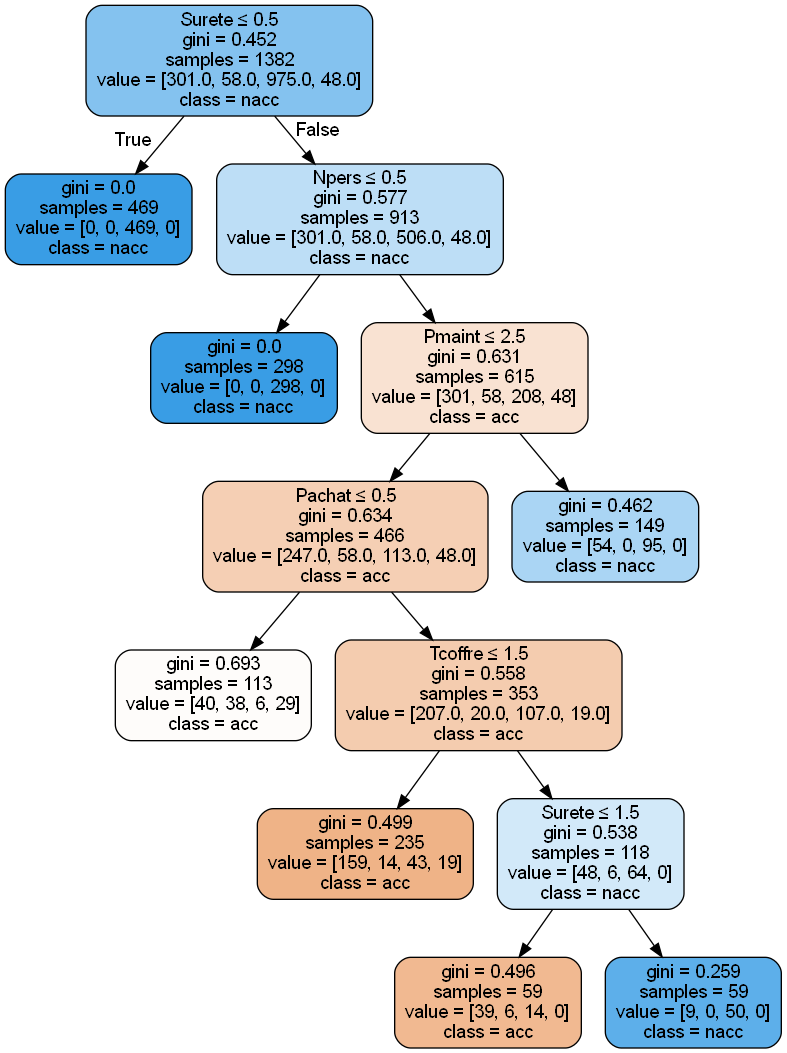

In [211]:
dot_data = StringIO()
export_graphviz(
    clf_gini,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["acc", "bon", "nacc", "tbon"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
graph.write_png("meteo-gini.png")
Image(graph.create_png())

### Création d'une fonction pour pouvoir utiliser plus facilement la méthode dans la suite de ce notebook

In [212]:
def REPTree(
    X_train,
    y_train,
    X_test,
    y_test,
    feature_cols,
    class_names,
    ccp_alpha: float = 0.01,
    max_depth: int = None,
    min_samples_leaf: int = 1,
    min_samples_split: int = 2,
):

    clf = DecisionTreeClassifier(
        ccp_alpha=ccp_alpha,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
    )
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    eval = eval_method(y_test, y_pred)

    dot_data = StringIO()
    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        rounded=True,
        special_characters=True,
        feature_names=feature_cols,
        class_names=class_names,
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
    # graph.write_png("meteo-gini.png")
    Image(graph.create_png())

    return graph, eval, clf

Accuracy :  0.8265895953757225
ROC AUC Score :  0.66708775950888
Kappa :  0.6094073377234243
Confusion Matrix :
 [[ 60   0  23   0]
 [ 11   0   0   0]
 [  9   0 226   0]
 [ 17   0   0   0]]


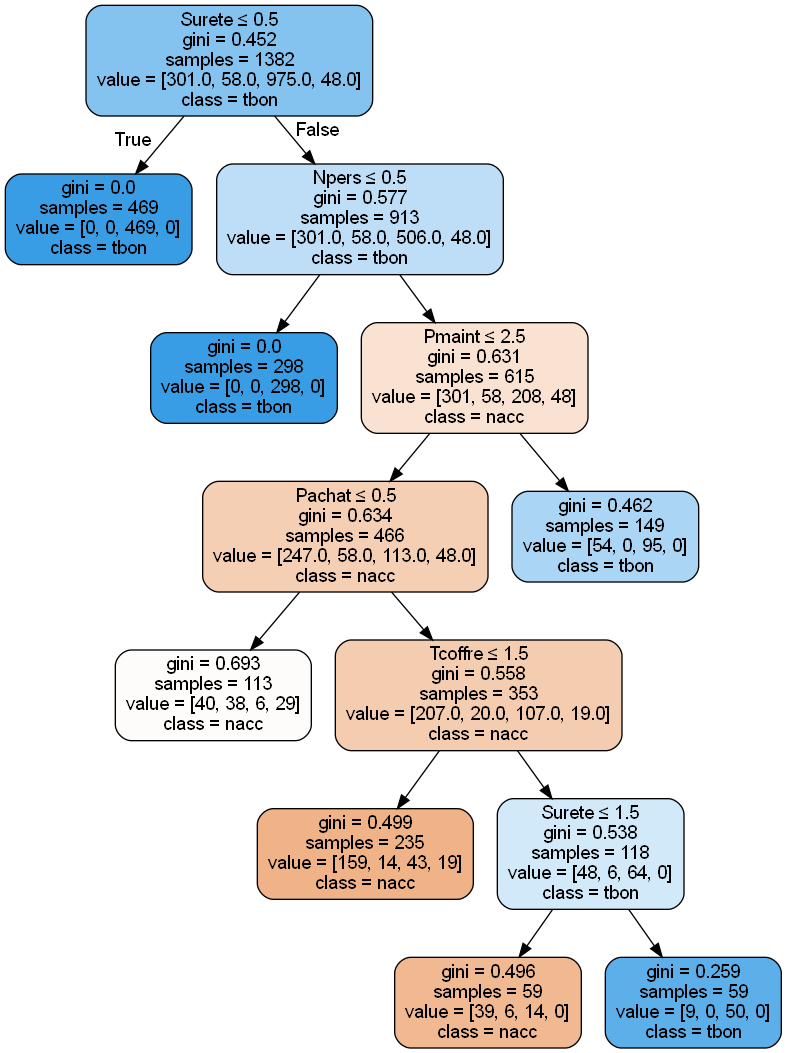

In [213]:
graph, result, _ = REPTree(X_train, y_train, X_test, y_test, feature_cols, class_names, ccp_alpha=0.01, min_samples_split=4)
Image(graph.create_png())

## Base "vote"

In [214]:
file = "datasets/vote.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [215]:
class_names = data['Class'].unique()
feature_cols = feature_cols = data.columns[:-1]
feature_cols, class_names

(Index(['handicapped-infants', 'water-project-cost-sharing',
        'adoption-of-the-budget-resolution', 'physician-fee-freeze',
        'el-salvador-aid', 'religious-groups-in-schools',
        'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
        'immigration', 'synfuels-corporation-cutback', 'education-spending',
        'superfund-right-to-sue', 'crime', 'duty-free-exports',
        'export-administration-act-south-africa'],
       dtype='object'),
 array(['republican', 'democrat'], dtype=object))

In [216]:
le = preprocessing.LabelEncoder()
le.fit(["republican", "democrat", "?", "n", "y"])


LabelEncoder()

In [217]:
# Vérifications
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
# Ou comme ceci : dictionary = dict(zip(le.classes_, le.transform(le.classes_)))
print(dictionary)

{np.str_('?'): np.int64(0), np.str_('democrat'): np.int64(1), np.str_('n'): np.int64(2), np.str_('republican'): np.int64(3), np.str_('y'): np.int64(4)}


In [218]:
for label in data.columns.values :
    res=le.transform(data[label])
    data[label]=res

data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,2,4,2,4,4,4,2,2,2,4,0,4,4,4,2,4,3
1,2,4,2,4,4,4,2,2,2,2,2,4,4,4,2,0,3
2,0,4,4,0,4,4,2,2,2,2,4,2,4,4,2,2,1
3,2,4,4,2,0,4,2,2,2,2,4,2,4,2,2,4,1
4,4,4,4,2,4,4,2,2,2,2,4,0,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2,2,4,4,4,4,2,2,4,4,2,4,4,4,2,4,3
431,2,2,4,2,2,2,4,4,4,4,2,2,2,2,2,4,1
432,2,0,2,4,4,4,2,2,2,2,4,4,4,4,2,4,3
433,2,2,2,4,4,4,0,0,0,0,2,4,4,4,2,4,3


In [219]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
280,2,2,4,2,2,2,4,4,4,4,2,2,2,4,2,4
78,4,4,4,2,4,4,2,2,2,4,4,2,4,4,2,4
113,2,0,2,4,4,4,2,2,2,4,2,4,4,4,2,2
253,2,4,2,4,4,4,2,2,2,2,2,4,4,4,2,4
324,2,4,2,4,4,4,2,2,2,2,4,4,4,4,2,2


Accuracy :  0.9655172413793104
ROC AUC Score :  0.9660138248847926
Precision :  0.9818181818181818
Recall :  0.9642857142857143
F1 Score :  0.972972972972973
Kappa :  0.9253645982270517
Confusion Matrix :
 [[54  2]
 [ 1 30]]


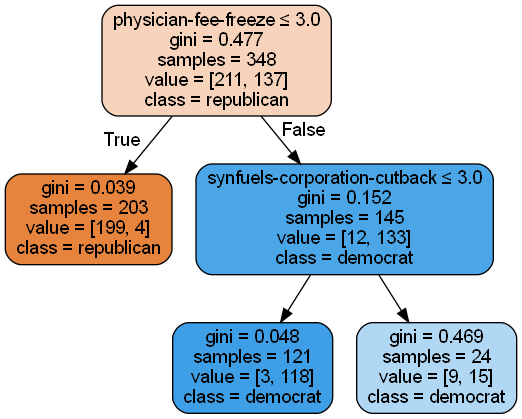

In [220]:
graph, result, clf = REPTree(X_train, y_train, X_test, y_test, feature_cols, class_names, ccp_alpha=0.01)
Image(graph.create_png())

Avec un modèle simple on obtient d'excellent résultats (toutes les mesures de performances sont bonnes).

## Base "wine"

In [230]:
file = "datasets/winequality-red.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [222]:
data['quality'] = data['quality'].astype(int).astype(str)

class_names = data['quality'].unique()

feature_cols = feature_cols = data.columns[:-1]
feature_cols, class_names

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'),
 array(['5', '6', '7', '4', '8', '3'], dtype=object))

In [223]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X,y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


Accuracy :  0.53125
ROC AUC Score :  0.5423081817398726
Kappa :  0.20731908709581526
Confusion Matrix :
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 110  20   0   0]
 [  0   0  72  60   0   0]
 [  0   0   7  35   0   0]
 [  0   0   0   5   0   0]]


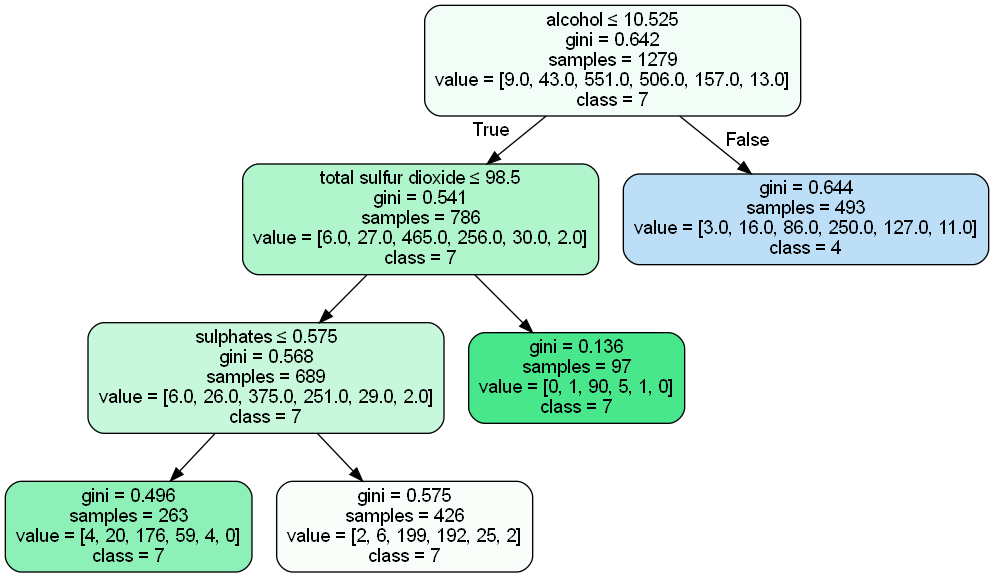

In [224]:
graph, _, clf = REPTree(X_train, y_train, X_test, y_test, feature_cols, class_names, ccp_alpha=0.01)
Image(graph.create_png())

(2.5, 8.5)

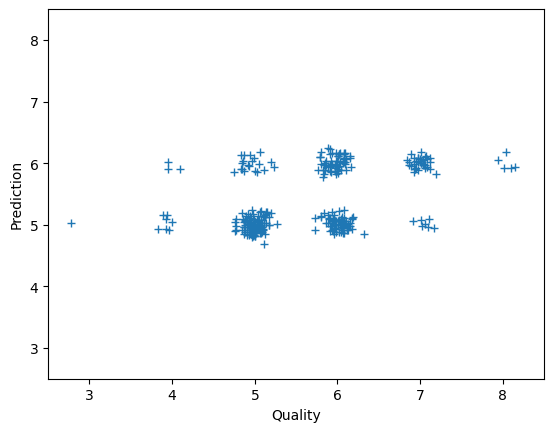

In [ ]:
y_pred = clf.predict(X_test)

y_test_int = np.array(y_test, dtype=int) + np.random.normal(0, 0.1, len(y_test))
y_pred_int = np.array(y_pred, dtype=int) + np.random.normal(0, 0.1, len(y_pred))

plt.plot(y_test_int, y_pred_int, '+')
plt.xlabel('Quality')
plt.ylabel('Prediction')
plt.xlim(2.5, 8.5)
plt.ylim(2.5, 8.5)

Les classes 5 et 6 ont beaucoup plus d'instance que les autres classes, ce qui fait que le classifieur ne prédit que ces deux classes.

On peut essayer de modifier les paramètres du modèle pour avoir de nouvelles classes prédites.

Accuracy :  0.521875
ROC AUC Score :  0.5593641545892064
Kappa :  0.22805247225025227
Confusion Matrix :
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 108  20   2   0]
 [  0   0  73  46  13   0]
 [  0   0   3  26  13   0]
 [  0   0   0   1   4   0]]


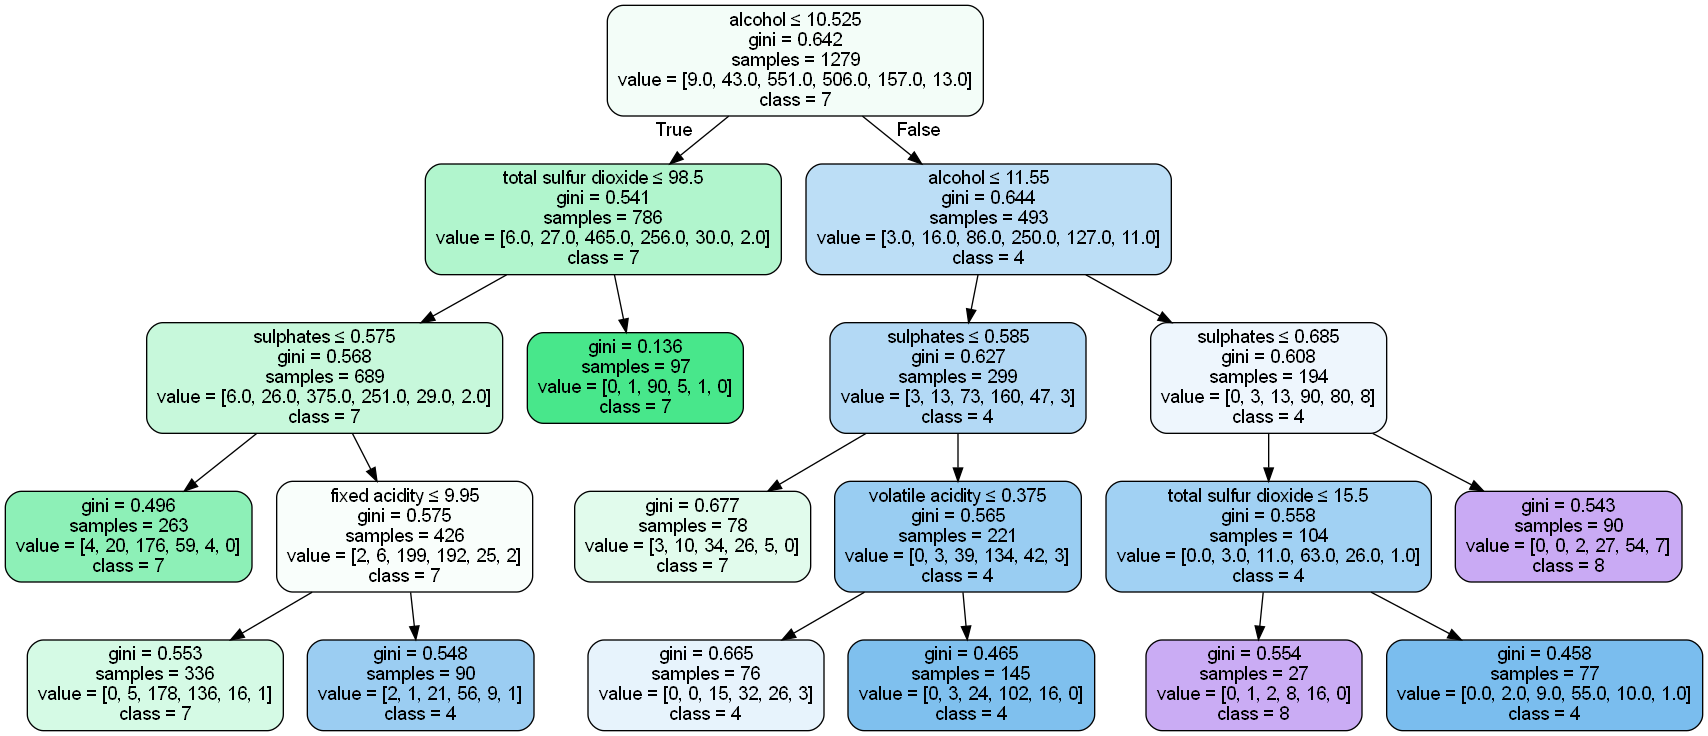

In [249]:
graph, _, clf = REPTree(X_train, y_train, X_test, y_test, feature_cols, class_names, ccp_alpha=0.005)#, min_samples_split=10, max_depth=5, min_samples_leaf=5)
Image(graph.create_png())

(2.5, 8.5)

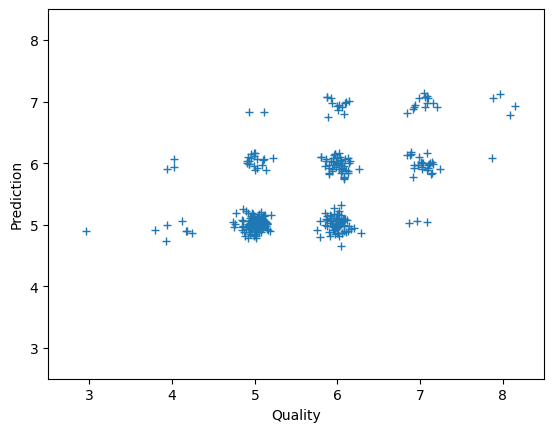

In [250]:
y_pred = clf.predict(X_test)

y_test_int = np.array(y_test, dtype=int) + np.random.normal(0, 0.1, len(y_test))
y_pred_int = np.array(y_pred, dtype=int) + np.random.normal(0, 0.1, len(y_pred))

plt.plot(y_test_int, y_pred_int, '+')
plt.xlabel('Quality')
plt.ylabel('Prediction')
plt.xlim(2.5, 8.5)
plt.ylim(2.5, 8.5)

Le modèle est capable de prédire une troisième classe. Si la précision est un peu inférieure au modèle précédent (0.52 ici alors qu'il est à 0.53), on a une augmentation du score ROC et de l'indice kappa : le modèle est donc un peu meilleur. Même si on a de meilleur résultat, le modèle reste peu satisfaisant.

Le 4 autres classes sont sous-représenté dans la base de données, je ne suis pas arrivé à faire un modèle qui soit capable de les prédire sans qu'il y ait du sur-apprentissage sur la base d'entrainement.